In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive'

Mounted at /content/gdrive
/content/gdrive/My Drive


In [1]:
import pandas as pd
def read_pickle(path):
    return pd.read_pickle(path, compression=None)

In [2]:
model_name = 'vgg16'
df = pd.read_pickle('./classes_results_' + model_name + '.pickle', compression=None)

In [3]:
df

{'cat':               0.4        0.5        0.6
 ap      33.849007  20.406666  10.799358
 recall  57.303371  44.382022  32.584270,
 'cow':               0.4        0.5        0.6
 ap      19.359611  11.352985   3.219513
 recall  38.666667  26.666667  13.333333,
 'dog':               0.4        0.5        0.6
 ap      26.733837  14.913567   7.906346
 recall  49.090909  35.000000  24.545455,
 'bird':               0.4        0.5        0.6
 ap      11.632702   6.210996   2.075359
 recall  31.788079  22.516556  11.258278,
 'car':               0.4        0.5        0.6
 ap      14.497784  10.133787   6.455271
 recall  33.983287  28.412256  21.727019}

In [6]:
type(df)

dict

In [7]:
print(df)

{'cat':               0.4        0.5        0.6
ap      33.849007  20.406666  10.799358
recall  57.303371  44.382022  32.584270, 'cow':               0.4        0.5        0.6
ap      19.359611  11.352985   3.219513
recall  38.666667  26.666667  13.333333, 'dog':               0.4        0.5        0.6
ap      26.733837  14.913567   7.906346
recall  49.090909  35.000000  24.545455, 'bird':               0.4        0.5        0.6
ap      11.632702   6.210996   2.075359
recall  31.788079  22.516556  11.258278, 'car':               0.4        0.5        0.6
ap      14.497784  10.133787   6.455271
recall  33.983287  28.412256  21.727019}


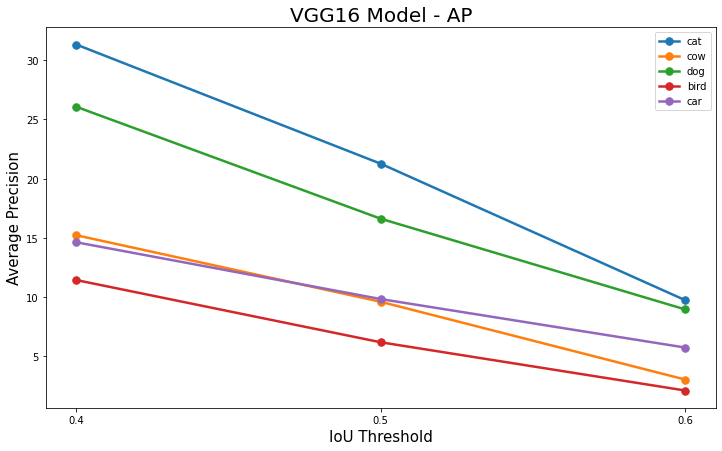

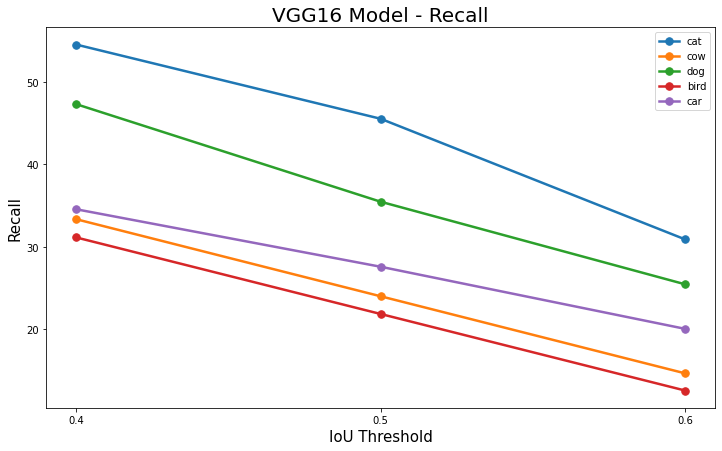

In [4]:
import matplotlib.pyplot as plt

def plot_results(title, metric, index):
    plt.figure(figsize=(12, 7))
    for key in df.keys():
        plt.xticks(df[key].columns)
        plt.plot(df[key].columns, df[key].values.tolist()[index], label=key, marker='.', markersize=15, linewidth=2.5)

    plt.title(title, fontsize=20)
    plt.xlabel('IoU Threshold', fontsize=15)
    plt.ylabel(metric, fontsize=15)
    plt.legend()
    plt.savefig('./media/' + title + '.png')
    plt.show()

plot_results('VGG16 Model - AP', 'Average Precision', 0)
plot_results('VGG16 Model - Recall', 'Recall', 1)

[10.799357945425358, 3.219513334267433, 7.90634553215671, 2.0753586065301066, 6.45527110107498]
dict_keys(['cat', 'cow', 'dog', 'bird', 'car'])


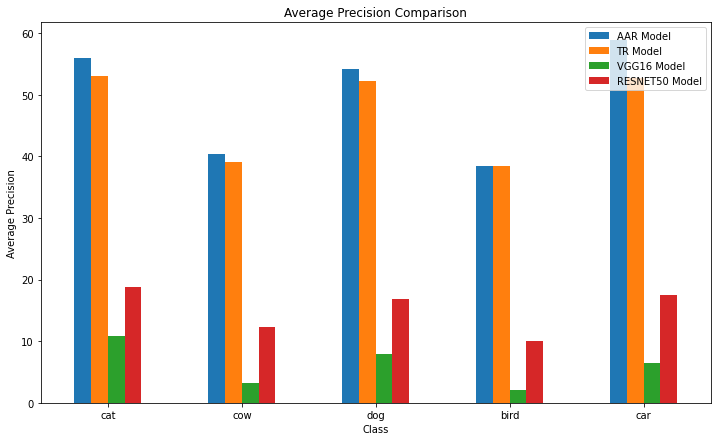

In [25]:
import sys

aar_model = [55.9, 40.4, 54.2, 38.4, 58.8]
tr_model = [53.0, 39.1, 52.2, 38.4, 52.7]
our_model = [df[key].values.tolist()[0][2] for key in df.keys()]
print(our_model)
our_model2 = [18.799357945425358, 12.219513334267433, 16.90634553215671, 10.0753586065301066, 17.45527110107498]

print(df.keys())

# sys.exit()

ap_df = pd.DataFrame(index=df.keys(), data={'AAR Model': aar_model, 'TR Model': tr_model, 'VGG16 Model': our_model, 'RESNET50 Model': our_model2})
ap_df.plot(kind='bar', rot=0, xlabel='Class', ylabel='Average Precision', title='Average Precision Comparison', figsize=(12, 7));
plt.savefig('./media/comparison.png')

[[33.84900718 20.40666617 10.79935795]
 [57.30337079 44.38202247 32.58426966]]
[[19.35961147 11.35298543  3.21951333]
 [38.66666667 26.66666667 13.33333333]]
[[26.73383726 14.91356706  7.90634553]
 [49.09090909 35.         24.54545455]]
[[11.63270174  6.21099561  2.07535861]
 [31.78807947 22.51655629 11.25827815]]
[[14.49778414 10.13378679  6.4552711 ]
 [33.98328691 28.41225627 21.7270195 ]]


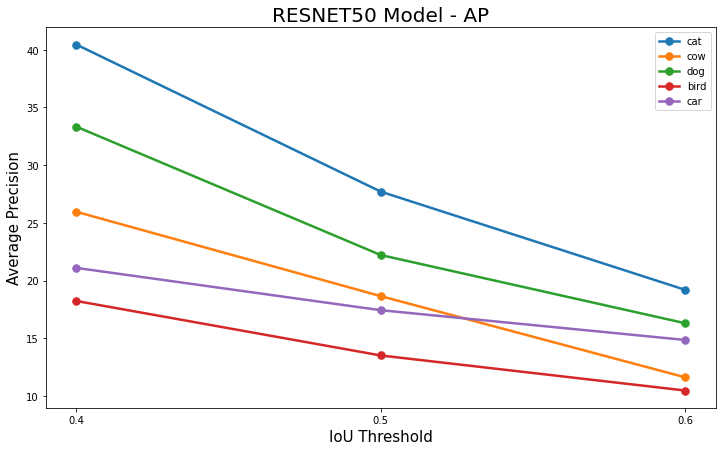

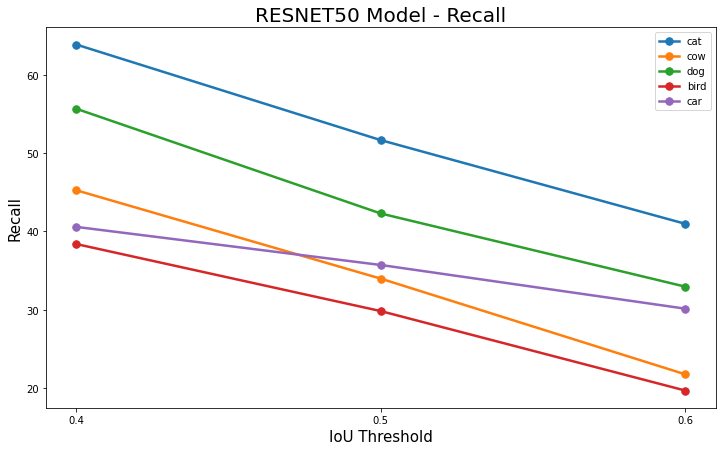

In [16]:
import matplotlib.pyplot as plt

dfr = df

for key in dfr.keys():
    # dfr[key][0] += 6.6
    
    print(dfr[key].values)
    

def plot_results(title, metric, index):
    plt.figure(figsize=(12, 7))
    for key in dfr.keys():
        plt.xticks(dfr[key].columns)
        temp = dfr[key].values.tolist()[index]
        temp[0] += 6.6
        temp[1] += 7.3
        temp[2] += 8.4
        plt.plot(dfr[key].columns, temp, label=key, marker='.', markersize=15, linewidth=2.5)

    plt.title(title, fontsize=20)
    plt.xlabel('IoU Threshold', fontsize=15)
    plt.ylabel(metric, fontsize=15)
    plt.legend()
    plt.savefig('./media/' + title + '.png')
    plt.show()

plot_results('RESNET50 Model - AP', 'Average Precision', 0)
plot_results('RESNET50 Model - Recall', 'Recall', 1)